# Proyek Analisis Data: E-Commerce Public Dataset
- Nama:Adelia Setiyaningrum
- Email:adeliasetiyaningrum15@gmail.com
- Id Dicoding:adelia_setiyaningrum

## Pertanyaan Bisnis

- Bagaimana Performa Penjualan dan Revenue Perusahaan E-Commerce dalam Beberapa Bulan Terakhir?
- Kategori produk apa yang menghasilkan revenue tertinggi?
- Bagaimana segmentasi terhadap kota pelanggan yang dimiliki oleh perusahaan?

## Library yang dibutuhkan


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
local_zip = '/content/drive/MyDrive/E-commerce-public-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive')
zip_ref.close()

In [3]:
customers_dataset = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/customers_dataset.csv", delimiter=",")
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation_dataset = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/geolocation_dataset.csv", delimiter=",")
geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_items_dataset = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv")
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments_dataset = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_payments_dataset.csv")
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews_dataset = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders_dataset = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/orders_dataset.csv")
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
product_category_name_translation = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/product_category_name_translation.csv")
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
products_dataset = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/products_dataset.csv")
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers_dataset = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/sellers_dataset.csv")
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [12]:
customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
#Melihat Duplikat Data
print("Jumlah duplikasi: ", customers_dataset.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
geolocation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
#Melihat Duplikat Data
print("Jumlah duplikasi: ", geolocation_dataset.duplicated().sum())

Jumlah duplikasi:  261831


In [16]:
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
#Melihat Duplikat Data
print("Jumlah duplikasi: ", order_items_dataset.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
#Melihat parameter statistik
order_items_dataset.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [19]:
order_payments_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [20]:
#Melihat Duplikat Data
print("Jumlah duplikasi: ", order_payments_dataset.duplicated().sum())

Jumlah duplikasi:  0


In [21]:
#Melihat parameter statistik
order_payments_dataset.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [22]:
order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [23]:
#Missing Value
order_reviews_dataset.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [24]:
#Melihat Duplikat Data
print("Jumlah duplikasi: ", order_reviews_dataset.duplicated().sum())

Jumlah duplikasi:  0


In [25]:
#Melihat parameter statistik
order_reviews_dataset.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [26]:
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [27]:
#Missing Value
orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [28]:
#Melihat Duplikat Data
print("Jumlah duplikasi: ", orders_dataset.duplicated().sum())

Jumlah duplikasi:  0


In [29]:
#Melihat parameter statistik
orders_dataset.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [30]:
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [31]:
#Melihat Duplikat Data
print("Jumlah duplikasi: ", product_category_name_translation.duplicated().sum())

Jumlah duplikasi:  0


In [32]:
products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [33]:
#Missing Value
products_dataset.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [34]:
#Melihat Duplikat Data
print("Jumlah duplikasi: ", products_dataset.duplicated().sum())

Jumlah duplikasi:  0


In [35]:
#Ringkasan Parameter Statistik
products_dataset.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [36]:
sellers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [37]:
#Melihat Duplikat Data
print("Jumlah duplikasi: ", sellers_dataset.duplicated().sum())

Jumlah duplikasi:  0


Hasil Assesing Data

1. geolocation_dataset
- duplicate data = 261831
2. order_items_dataset
- inaccurate value = terdapat pada kolom freight_value (min)
- Kesalahan tipe data untuk kolom shipping_limit_date
3. order_payment_dataset
- inaccurate value = terdapat pada kolom payment_installments dan payment_value (min)
4. order_reviews_dataset
- missing value = pada kolom reviews_comments_title dan reviews_comments_title
- Kesalahan tipe data untuk reviews_creations_date dan reviews_answer_timestamp
5. orders_dataset
- missing value = terdapat pada kolom order_approved_at, order_deliver_carier_date dan order_deliver_customer_date
- Kesalahan tipe data untuk order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date dan order_estimated_delivery_date
6. products_dataset
- missing value terdapat pada semua kolom kecuali product_id
- inaccurate value = product_weight_g (min)


### Cleaning Data

**Duplicate Data**

In [38]:
#Menghapus data duplikat
geolocation_dataset.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_dataset.duplicated().sum())

Jumlah duplikasi:  0


**Missing Value**

- Mengatasi missing value pada order_reviews_dataset
- Missing value terdapat pada kolom reviews_comments_title dan reviews_comments_title sehingga kolom ini dapat dihilangkan karena bukan data kuantitatif

In [40]:
columns_to_drop = ['review_comment_title', 'review_comment_message']
order_reviews_dataset = order_reviews_dataset.drop(columns_to_drop, axis=1)
order_reviews_dataset.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


- Mengatasi missing value pada orders_dataset
- kolom order_approved_at, order_deliver_carier_date dan order_deliver_customer_date tidak dapat dilakukan imputation atau interpolation dikarenakan data waktu akan dilakukan dropping

In [39]:
orders_dataset.dropna(axis=0, inplace=True)
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


Mengatasi missing value pada products_dataset terdapat pada semua kolom kecuali product_id dan jumlahnya relatif sedikit dibandingkan dengan seluruh data sehingga akan dilakukan dropping

In [41]:
products_dataset.dropna(axis=0, inplace=True)
products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


**Inaccurate Value**

- Mengatasi inaccurate value pada order_items_dataset baris freight_value minimum
- nilai freight_value merupakan komponen penting dalam perhitungan biaya total untuk pengiriman barang

In [42]:
order_items_dataset[order_items_dataset.freight_value == order_items_dataset.freight_value.min()]

order_items_dataset.freight_value.replace(order_items_dataset.freight_value.min(), 1, inplace=True)
order_items_dataset[order_items_dataset.freight_value == order_items_dataset.freight_value.min()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
28981,41ef253cac66335bdb0b51fb4853f04e,1,c4a6de6225217d4539c861c0b6316d86,7b07b3c7487f0ea825fc6df75abd658b,2018-08-15 17:45:28,99.90,0.01
37231,547b3596c03dfad1b87305e9c5a554c2,3,457cd0a99cfa977993e4eb6d98d95abb,ea8482cd71df3c1969d7b9473ff13abc,2018-04-26 23:30:52,39.99,0.01
49446,7062eab93cccc51550b18e1787e7b8b1,1,78f3f7fb2c7a8a53bccb6cfc49f34f66,e9779976487b77c6d4ac45f75ec7afe9,2017-06-07 13:10:24,92.99,0.01
106668,f26d3cc4231c7230b8603f2beede9ea9,2,28857b241545853875bda6661ccdf0f7,2b2fed75b8e5ea3a052fc4c0825da485,2017-07-07 19:55:12,113.00,0.01


In [43]:
order_payments_dataset.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


Mengatasi inaccurate value pada baris payment_installments dan payment_value minimum

In [44]:
order_payments_dataset[order_payments_dataset.payment_installments == order_payments_dataset.payment_installments.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


pada order_payments_dataset untuk credit card memiliki payments_installment 1 sehingga payments_installment credit_card yang bernilai 0 diubah menjadi 1

In [45]:
order_payments_dataset.payment_installments.replace(order_payments_dataset.payment_installments.min(), 1, inplace=True)
order_payments_dataset[order_payments_dataset.payment_installments == order_payments_dataset.payment_installments.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95
11,2480f727e869fdeb397244a21b721b67,1,credit_card,1,141.90
...,...,...,...,...,...
103874,d41f1036712e18ee525939d08b7a1c98,1,credit_card,1,3.57
103877,3531718b24dfd5022fb0d101e10e33b9,1,credit_card,1,194.11
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


In [46]:
#pada payment_value
order_payments_dataset[order_payments_dataset.payment_value == order_payments_dataset.payment_value.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [47]:
payment_voucher = order_payments_dataset.loc[order_payments_dataset['payment_type'] == 'voucher']
payment_voucher

,order_id,payment_sequential,payment_type,payment_installments,payment_value
25,5cfd514482e22bc992e7693f0e3e8df7,2,voucher,1,45.17
68,947e9c6bfd83a06953c420ef92d3da6e,1,voucher,1,69.46
70,e3e9e3295f4e1512167c232a0aaae8a5,1,voucher,1,50.80
75,3689194c14ad4e2e7361ebd1df0e77b0,2,voucher,1,57.53
102,21b8b46679ea6482cbf911d960490048,2,voucher,1,43.12
...,...,...,...,...,...
103747,cf101c3abd3c061ca9f78c1bbb1125af,3,voucher,1,8.46
103750,d0bff47153ef056bb4f884a2ec2f0691,2,voucher,1,41.89
103795,59de68e3ef040153cc9ea7978eaec149,1,voucher,1,65.71
103798,4f259869d5c650af6f847b027032515b,1,voucher,1,176.56


In [48]:
payment_notdef = order_payments_dataset.loc[order_payments_dataset['payment_type'] == 'not_defined']
payment_notdef

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


Setelah dilihat pada payment dengan voucher memiliki kemungkinan value 0 atau gratis dan not difined nilai valuenya kemungkinan 0 karena tipe pembayaran yang tidak jelas. Oleh karena itu pada minimum payment_value bukan termasuk inaccurate value

- Mengatasi inaccurate value pada products_dataset baris product_weight_g minimum
- produk pasti memiliki berat walaupun sangat ringan

In [49]:
products_dataset[products_dataset.product_weight_g == products_dataset.product_weight_g.min()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


In [50]:
products_dataset.product_weight_g.replace(products_dataset.product_weight_g.min(), 1, inplace=True)
products_dataset[products_dataset.product_weight_g == products_dataset.product_weight_g.min()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,1.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,1.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,1.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,1.0,30.0,25.0,30.0


**Tipe Data**

Memperbaiki tipe data pada order_items_dataset kolom shipping_limit_date yang mana tipe data diubah dari menjadi datetime

In [51]:
order_items_columns = ["shipping_limit_date"]

for column in order_items_columns:
  order_items_dataset[column] = pd.to_datetime(order_items_dataset[column])

order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Memperbaiki tipe data pada order_reviews_dataset yang mana tipe data diubah menjadi datetime

In [52]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_dataset[column] = pd.to_datetime(order_reviews_dataset[column])

order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


Memperbaiki tipe data pada orders_dataset yang mana tipe data menjadi datetime

In [53]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
                    "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_dataset[column] = pd.to_datetime(orders_dataset[column])

orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


## Exploratory Data Analysis (EDA)

In [54]:
customers_dataset.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [55]:
customers_dataset.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

dapat dilihat bahwa pelanggan kebanyakan berasal dari kota sao paulo dengan jumlah 15540 pelanggan

In [56]:
geolocation_dataset.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [57]:
order_items_dataset.describe(include="all")

<ipython-input-57-c8880c34d45e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_items_dataset.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.993720
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.802212
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.010000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


Melihat product_id yang paling diminati dengan order_items_dataset

In [58]:
order_items_dataset.groupby(by="product_id").order_id.count().sort_values(ascending=True)

product_id
00066f42aeeb9f3007548bb9d3f33c38      1
911e26785862f450cf2240fc5168f83d      1
911cfb37438b7fa9ad54535990178868      1
911b8d269dbaa6c005b23d04e1c7fcbc      1
9117307cf75efa6e964d697f0d1297f9      1
                                   ... 
368c6c730842d78016ad823897a372db    388
389d119b48cf3043d311335e499d9c6b    392
422879e10f46682990de24d770e7f83d    484
99a4788cb24856965c36a24e339b6058    488
aca2eb7d00ea1a7b8ebd4e68314663af    527
Name: order_id, Length: 32951, dtype: int64

In [59]:
order_payments_dataset.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853368,154.100380
std,NaN,0.706584,NaN,2.687034,217.494064
min,NaN,1.000000,NaN,1.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [60]:
order_payments_dataset.groupby(by="payment_type").order_id.count()

payment_type
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
Name: order_id, dtype: int64

dapat dilihat bahwa jenis pembayaran yang paling sering digunakan yaitu credit card

In [61]:
order_reviews_dataset.describe(include="all")

<ipython-input-61-58f8408ef13b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_reviews_dataset.describe(include="all")
<ipython-input-61-58f8408ef13b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_reviews_dataset.describe(include="all")


,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224
unique,98410,98673,NaN,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,463,4
first,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN


Melihat jumlah review masing-masing score

In [62]:
order_reviews_dataset.groupby(by="review_score").order_id.count().sort_values(ascending=False)

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: order_id, dtype: int64

In [63]:
orders_dataset.describe(include="all")

<ipython-input-63-ff66c4c30c17>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_dataset.describe(include="all")
<ipython-input-63-ff66c4c30c17>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_dataset.describe(include="all")
<ipython-input-63-ff66c4c30c17>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_dataset.describe(include="all")
<ipython-input-63-ff66c4c30c17>

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,95939,88272,80100,95649,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96455,3,9,47,3,507
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [64]:
orders_dataset.groupby(by="order_status").customer_id.count()

order_status
canceled         6
delivered    96455
Name: customer_id, dtype: int64

In [65]:
product_category_name_translation.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [66]:
products_dataset.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956710,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291779,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,1.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [67]:
products_dataset.sort_values(by="product_category_name", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
17366,01ea398598302b06869909ac5bfa5bcf,utilidades_domesticas,56.0,649.0,1.0,5000.0,35.0,28.0,32.0
22551,9f70acf998b0bd14652234075a19d358,utilidades_domesticas,25.0,326.0,1.0,1400.0,38.0,5.0,21.0
22575,2514ff519f69595934371404ff50911d,utilidades_domesticas,44.0,752.0,4.0,445.0,19.0,12.0,12.0
3319,eb464e3e06e2701a532c9f08a774d0d0,utilidades_domesticas,50.0,440.0,1.0,148.0,25.0,27.0,22.0
11749,021d39ee869e87d5288f4e731df4a90e,utilidades_domesticas,44.0,663.0,4.0,10350.0,102.0,15.0,40.0
...,...,...,...,...,...,...,...,...,...
28803,5b951e54437768080925aabe01e24348,agro_industria_e_comercio,54.0,747.0,1.0,380.0,22.0,11.0,14.0
9383,1f541a93f4fa4b8d15c7d5ed83836484,agro_industria_e_comercio,50.0,418.0,1.0,12850.0,41.0,42.0,47.0
19739,f075897551d47345068c1d90ed454fe1,agro_industria_e_comercio,48.0,948.0,1.0,6820.0,54.0,54.0,35.0
28858,fbec390384fbb8d53d97c29a5bbb26ae,agro_industria_e_comercio,38.0,145.0,1.0,1640.0,37.0,34.0,31.0


In [68]:
sellers_dataset.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [69]:
sellers_dataset.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

Melakukan merge pada order_items_dataset dan order_payments_dataset

In [70]:
order_items_payments_dataset = pd.merge(
    left=order_items_dataset,
    right=order_payments_dataset,
    how="outer",
    left_on="order_id",
    right_on="order_id"
)
order_items_payments_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


Melakukan merge pada order_reviews_dataset dan orders_dataset

In [71]:
order_reviews_orders_dataset = pd.merge(
    left=order_reviews_dataset,
    right=orders_dataset,
    how="right",
    left_on="order_id",
    right_on="order_id"
)
order_reviews_orders_dataset.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,4.0,2018-08-08,2018-08-08 18:37:50,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,e73b67b67587f7644d5bd1a52deb1b01,47770eb9100c2d0c44946d9cf07ec65d,5.0,2018-08-18,2018-08-22 19:07:58,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,359d03e676b3c069f62cadba8dd3f6e8,949d5b44dbf5de918fe9c16f97b45f8a,5.0,2017-12-03,2017-12-05 19:21:58,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,e50934924e227544ba8246aeb3770dd4,ad21c59c0840e6cb83a9ceb5573f8159,5.0,2018-02-17,2018-02-18 13:02:51,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


Melakukan merge pada seluruh data order

In [72]:
orders_all_dataset = pd.merge(
    left=order_reviews_orders_dataset,
    right=order_items_payments_dataset,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_all_dataset.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12
1,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00
2,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59
3,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,4.0,2018-08-08,2018-08-08 18:37:50,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,...,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46
4,e73b67b67587f7644d5bd1a52deb1b01,47770eb9100c2d0c44946d9cf07ec65d,5.0,2018-08-18,2018-08-22 19:07:58,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,...,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12


In [73]:
orders_all_dataset.groupby(by="order_status").order_id.count()

order_status
canceled          7
delivered    115699
Name: order_id, dtype: int64

In [74]:
orders_all_dataset.groupby(by="payment_type").order_id.count()

payment_type
boleto         22490
credit_card    85371
debit_card      1661
voucher         6181
Name: order_id, dtype: int64

Melakukan merge customers_dataset dan orders_all_dataset

In [75]:
orders_all_customers_dataset = pd.merge(
    left=orders_all_dataset,
    right=customers_dataset,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_all_customers_dataset.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,29.99,8.72,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,29.99,8.72,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,29.99,8.72,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,4.0,2018-08-08,2018-08-08 18:37:50,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,...,118.70,22.76,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,e73b67b67587f7644d5bd1a52deb1b01,47770eb9100c2d0c44946d9cf07ec65d,5.0,2018-08-18,2018-08-22 19:07:58,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,...,159.90,19.22,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [76]:
orders_all_customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115706 entries, 0 to 115705
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      114845 non-null  object        
 1   order_id                       115706 non-null  object        
 2   review_score                   114845 non-null  float64       
 3   review_creation_date           114845 non-null  datetime64[ns]
 4   review_answer_timestamp        114845 non-null  datetime64[ns]
 5   customer_id                    115706 non-null  object        
 6   order_status                   115706 non-null  object        
 7   order_purchase_timestamp       115706 non-null  datetime64[ns]
 8   order_approved_at              115706 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115706 non-null  datetime64[ns]
 10  order_delivered_customer_date  115706 non-null  datetime64[ns]
 11  

Melakukan merge pada orders_all_customers_dataset dan sellers_dataset

In [77]:
orders_customers_sellers_dataset = pd.merge(
    left=orders_all_customers_dataset,
    right=sellers_dataset,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
orders_customers_sellers_dataset.head()


,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
1,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
2,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
3,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,4.0,2018-08-08,2018-08-08 18:37:50,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,...,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP
4,e73b67b67587f7644d5bd1a52deb1b01,47770eb9100c2d0c44946d9cf07ec65d,5.0,2018-08-18,2018-08-22 19:07:58,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,...,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP


Pivot table untuk memperoleh informasi terkait jumlah order berdasarkan kota

In [78]:
orders_customers_sellers_dataset.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False)

customer_city
sao paulo             15044
rio de janeiro         6603
belo horizonte         2697
brasilia               2071
curitiba               1489
                      ...  
ponto novo                1
ponto do marambaia        1
ponto belo                1
pontes gestal             1
retirolandia              1
Name: order_id, Length: 4085, dtype: int64

Pivot table untuk memperoleh informasi terkait jumlah order berdasarkan metode pembayaran

In [79]:
orders_customers_sellers_dataset.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    74302
boleto         19177
voucher         3679
debit_card      1484
Name: order_id, dtype: int64

Pivot table untuk memperoleh informasi terkait jumlah penjual berdasarkan kota

In [80]:
orders_customers_sellers_dataset.groupby(by="seller_city").order_id.nunique().sort_values(ascending=False)

seller_city
sao paulo          24032
ibitinga            6446
curitiba            2671
santo andre         2635
belo horizonte      2347
                   ...  
irece                  1
passos                 1
tambau                 1
itapui                 1
abadia de goias        1
Name: order_id, Length: 595, dtype: int64

Melakukan merge pada product_category_name_translation dan products_dataset

In [81]:
products_all_dataset = pd.merge(
    left=product_category_name_translation,
    right=products_dataset,
    how="right",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_all_dataset.head()

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,perfumaria,perfumery,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,artes,art,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,esporte_lazer,sports_leisure,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,bebes,baby,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,utilidades_domesticas,housewares,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0


# Explorasi all_dataset

Melakukan merge pada orders_customers_sellers_dataset dan product_all_dataset

In [82]:
all_dataset = pd.merge(
    left=orders_customers_sellers_dataset,
    right=products_all_dataset,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
all_dataset.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_state,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,SP,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,SP,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,SP,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,4.0,2018-08-08,2018-08-08 18:37:50,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,...,SP,perfumaria,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,e73b67b67587f7644d5bd1a52deb1b01,47770eb9100c2d0c44946d9cf07ec65d,5.0,2018-08-18,2018-08-22 19:07:58,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,...,SP,automotivo,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0


In [83]:
all_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115706 entries, 0 to 115705
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      114845 non-null  object        
 1   order_id                       115706 non-null  object        
 2   review_score                   114845 non-null  float64       
 3   review_creation_date           114845 non-null  datetime64[ns]
 4   review_answer_timestamp        114845 non-null  datetime64[ns]
 5   customer_id                    115706 non-null  object        
 6   order_status                   115706 non-null  object        
 7   order_purchase_timestamp       115706 non-null  datetime64[ns]
 8   order_approved_at              115706 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115706 non-null  datetime64[ns]
 10  order_delivered_customer_date  115706 non-null  datetime64[ns]
 11  

Preferensi pembelian berdasarkan kota pelanggan dan tipe produk

In [84]:
all_dataset.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "order_item_id": "sum",
    "price": "sum"
}).sort_values(by=["order_item_id", "price"], ascending=False)

order_item_id      price
customer_city    product_category_name_english                            
sao paulo        bed_bath_table                          2783.0  181641.26
                 health_beauty                           2283.0  191292.39
                 furniture_decor                         1833.0  104898.42
                 housewares                              1827.0  110881.17
                 computers_accessories                   1754.0  142404.28
...                                                         ...        ...
esteio           consoles_games                             1.0       5.18
tupa             construction_tools_construction            1.0       3.99
caldas novas     fashion_underwear_beach                    1.0       3.90
palmeira d'oeste computers_accessories                      1.0       3.90
hortolandia      construction_tools_construction            1.0       0.85

[24891 rows x 2 columns]

- Berdasarkan hasil di atas, terlihat bahwa pada kota sao paulo paling banyak terjual produk dengan kategori bad_bath_tables yaitu sebanyak 2783 item dan mempunyai total hasil penjualan sebanyak $181641.26
- Dapat dilihat juga kota sao paulo merupakan kota dengan minat beli yang tinggi

Menyimpan all_dataset dalam bentuk csv

In [85]:
all_dataset.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Performa Penjualan dan Revenue Perusahaan E-Commerce dalam Beberapa Bulan Terakhir?

In [86]:
monthly_orders_dataset = all_dataset.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})

monthly_orders_dataset.index = monthly_orders_dataset.index.strftime('%Y-%m')
monthly_orders_dataset = monthly_orders_dataset.reset_index()
monthly_orders_dataset.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

monthly_orders_dataset.head()

,order_purchase_timestamp,order_count,revenue
0,2016-09,1,134.97
1,2016-10,270,42422.66
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,748,121294.92


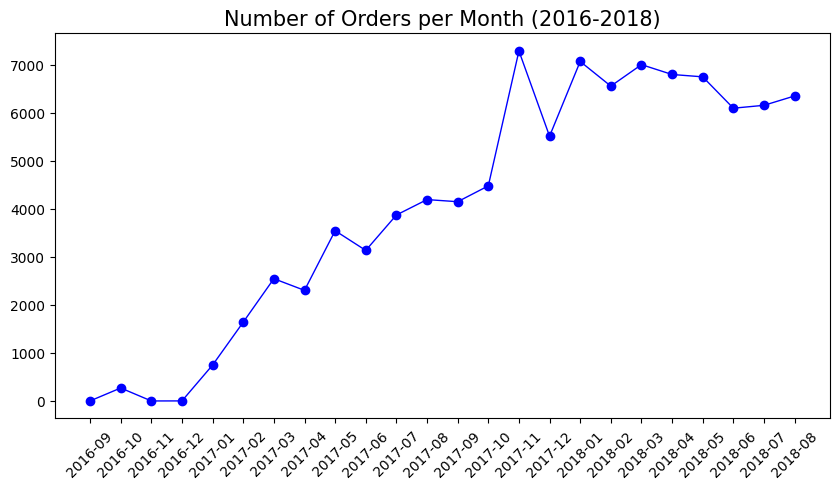

In [87]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_dataset["order_purchase_timestamp"], monthly_orders_dataset["order_count"], marker='o', linewidth=1, color= "#0000FF")
plt.title("Number of Orders per Month (2016-2018)", loc="center", fontsize=15)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order terbanyak terjadi pada bulan November 2017. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan Desember 2017.

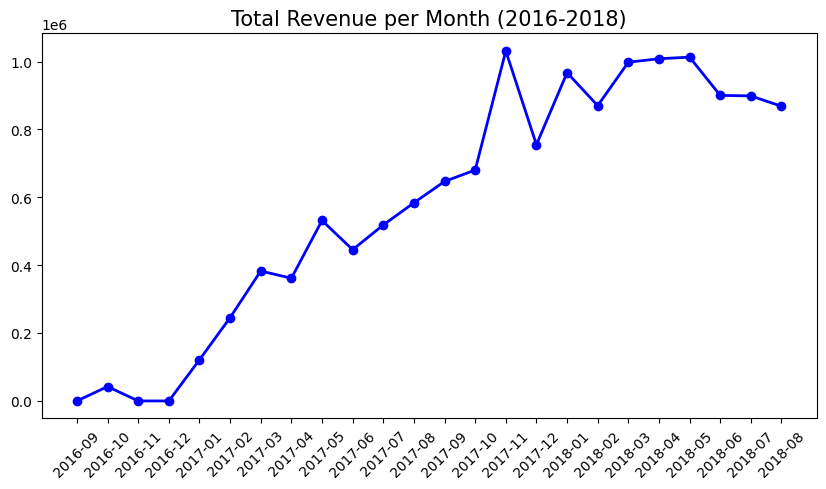

In [88]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_dataset["order_purchase_timestamp"],
    monthly_orders_dataset["revenue"],
    marker='o',
    linewidth=2,
    color="#0000FF"
)
plt.title("Total Revenue per Month (2016-2018)", loc="center", fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa pendapatan terbanyak terjadi pada bulan November 2017. Selain itu, kita juga dapat melihat adanya penurunan pendapatan yang cukup signifikan pada bulan Desember 2017.

### Pertanyaan 2: Kategori produk apa yang menghasilkan revenue tertinggi?

In [95]:
product_revenue = all_dataset.groupby("product_category_name_english").price.sum().sort_values(ascending=False).reset_index()
product_revenue.head(10)

,product_category_name_english,price
0,health_beauty,1275856.38
1,watches_gifts,1214342.45
2,bed_bath_table,1092327.21
3,sports_leisure,995754.28
4,computers_accessories,926446.44
5,furniture_decor,752648.19
6,housewares,650395.78
7,cool_stuff,636391.52
8,auto,604178.54
9,garden_tools,493510.87


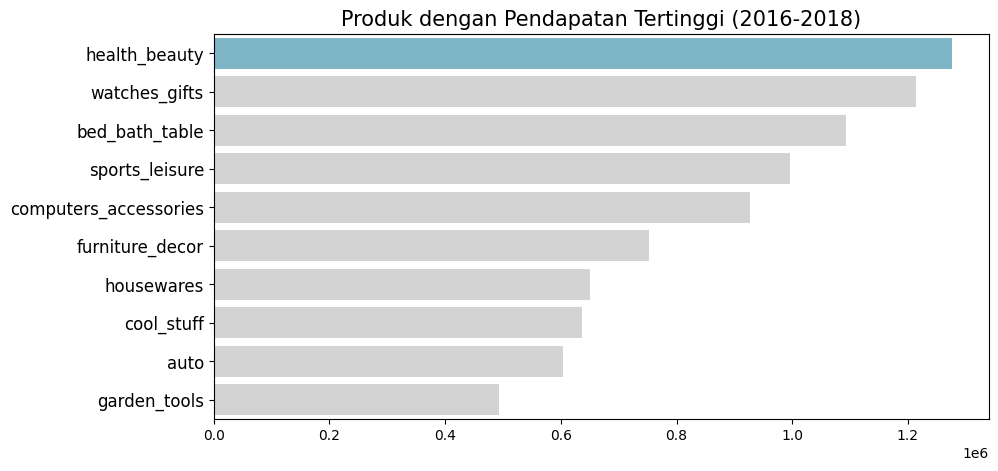

In [98]:
plt.figure(figsize=(10, 5))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3"]

sns.barplot(x="price", y="product_category_name_english", data=product_revenue.head(10), palette=colors)

plt.title("Produk dengan Pendapatan Tertinggi (2016-2018)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()
plt.show()

Berdasarkan visualisasi data tersebut, dapat diketahui bahwa kategori produk yang menghasilkan pendapatan tertinggi dari tahun 2016-2018 adalah health_beauty

# Pertanyaan 3: Bagaimana segmentasi terhadap kota pelanggan yang dimiliki oleh perusahaan?

In [108]:
rfm_dataset = all_dataset.groupby(by="customer_city", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})
rfm_dataset.columns = ["customer_city", "max_order_timestamp", "frequency", "monetary"]

rfm_dataset.drop("max_order_timestamp", axis=1, inplace=True)
rfm_dataset.head()

,customer_city,frequency,monetary
0,abadia dos dourados,3,358.90
1,abadiania,1,949.99
2,abaete,11,1597.81
3,abaetetuba,11,4058.47
4,abaiara,2,262.90


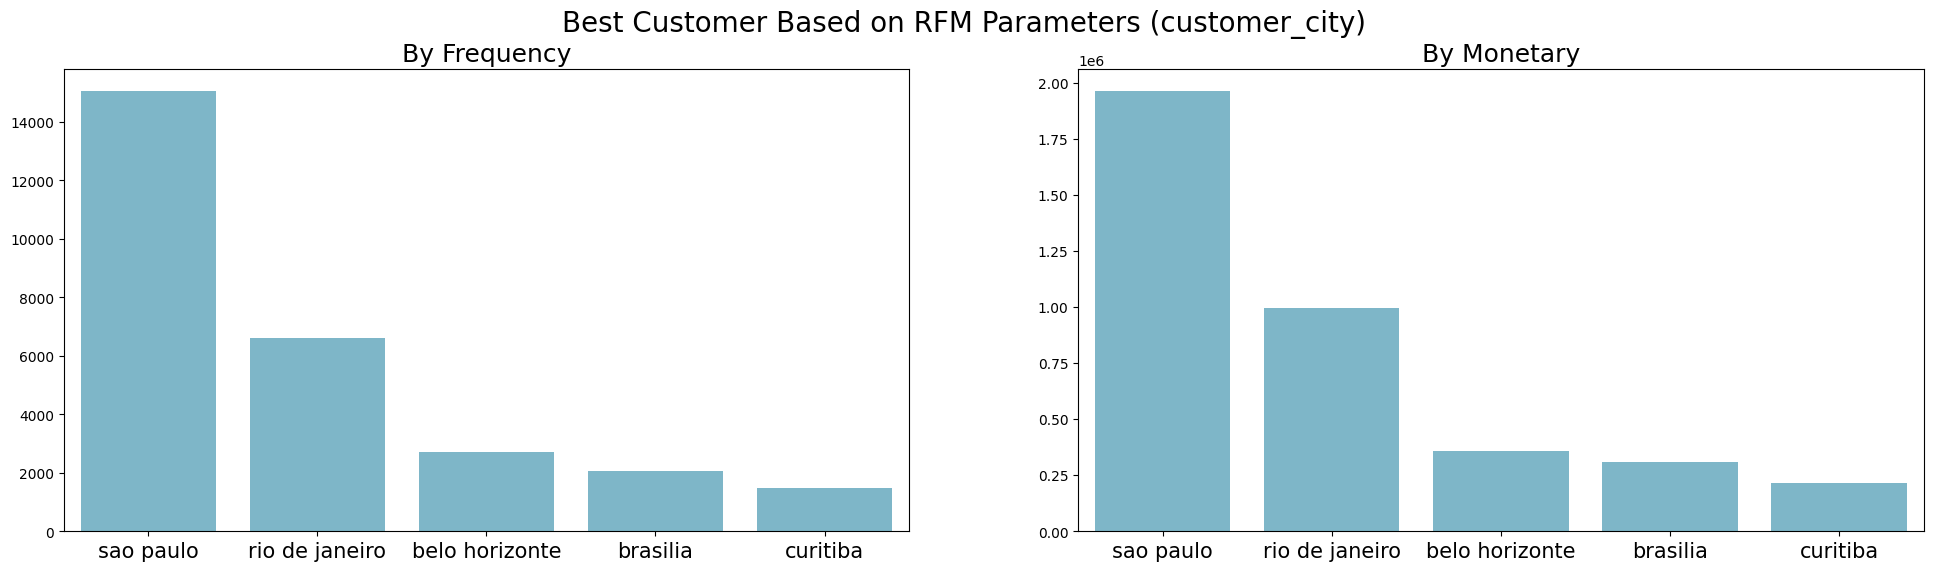

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="frequency", x="customer_city", data=rfm_dataset.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Frequency", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_city", data=rfm_dataset.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Monetary", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_city)", fontsize=20)
plt.show()

Dari visualisasi data di atas, kita dapat melihat beberapa kota yang memiliki pelanggan terbaik berdasarkan dua parameter tersebut. Pelanggan yang berasal dari Sao Paulo merupakan pelanggan yang sering melakukan transaksi dan juga pelanggan dari kota Sao Paulo menghasilkan revenue terbesar.

## Conclusion

1. Jumlah order maupun jumlah total pendapatan terbanyak terjadi pada bulan November 2017. Selain itu, penurunan pendapatan dan jumlah order yang cukup signifikan terjadi pada bulan Desember 2017. Penurunan ini tentunya perlu dicari penyebabnya dan juga solusinya sehingga tidak akan terjadi hal yang serupa di tahun-tahun berikutnya.
2. Pada tahun 2016-2018 kategori produk yang menghasilkan pendapatan tertinggi adalah health_beauty. Oleh karena itu, bisa dibuat studi kasus tersendiri terkait kategori ini karena peluang pasarnya yang cukup bagus.
3. Kota pelanggan dibagi menjadi 2 kategori:
- Berdasarkan frequency, pelanggan dari kota sao paulo merupakan pelanggan yang sering melakukan transaksi dibandingkan dengan kota lainnya
- Berdasarkan monetory, pelanggan dari kota sao paulo menghasilkan total revenue terbesar dibandingkan dengan kota lainnya

In [113]:
!pip freeze > requirements.txt
